In [2]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 776.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 3.6 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.0 MB/s eta 0:00:00-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 5.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 5.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 5.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 6.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 5.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.

In [3]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report

In [4]:
file_path = 'train'

In [5]:
name_class = os.listdir(file_path)

In [6]:
name_class

['malignant', 'benign']

In [7]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [8]:
filepaths

['train/malignant/melanoma_7039.jpg',
 'train/malignant/melanoma_9014.jpg',
 'train/malignant/melanoma_6327.jpg',
 'train/malignant/melanoma_5148.jpg',
 'train/malignant/melanoma_6441.jpg',
 'train/malignant/melanoma_7987.jpg',
 'train/malignant/melanoma_6455.jpg',
 'train/malignant/melanoma_7993.jpg',
 'train/malignant/melanoma_8478.jpg',
 'train/malignant/melanoma_9000.jpg',
 'train/malignant/melanoma_6333.jpg',
 'train/malignant/melanoma_5612.jpg',
 'train/malignant/melanoma_7005.jpg',
 'train/malignant/melanoma_8336.jpg',
 'train/malignant/melanoma_9028.jpg',
 'train/malignant/melanoma_7763.jpg',
 'train/malignant/melanoma_8450.jpg',
 'train/malignant/melanoma_5174.jpg',
 'train/malignant/melanoma_5160.jpg',
 'train/malignant/melanoma_6469.jpg',
 'train/malignant/melanoma_7777.jpg',
 'train/malignant/melanoma_8444.jpg',
 'train/malignant/melanoma_7011.jpg',
 'train/malignant/melanoma_8322.jpg',
 'train/malignant/melanoma_5606.jpg',
 'train/malignant/melanoma_5835.jpg',
 'train/mali

In [9]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [10]:
labels

['malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'mali

In [11]:
filepath = pd. Series (filepaths, name='Filepath').astype(str)

labels = pd.Series (labels, name='Label')

data = pd.concat([filepath, labels], axis=1)

data = data.sample(frac=1).reset_index(drop=True)

data.head(5)

,Filepath,Label
0,train/malignant/melanoma_8855.jpg,malignant
1,train/benign/melanoma_917.jpg,benign
2,train/malignant/melanoma_8552.jpg,malignant
3,train/malignant/melanoma_5954.jpg,malignant
4,train/malignant/melanoma_7180.jpg,malignant


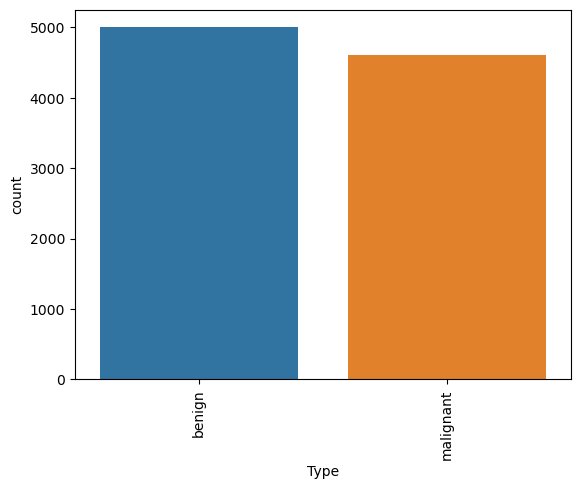

In [12]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [13]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

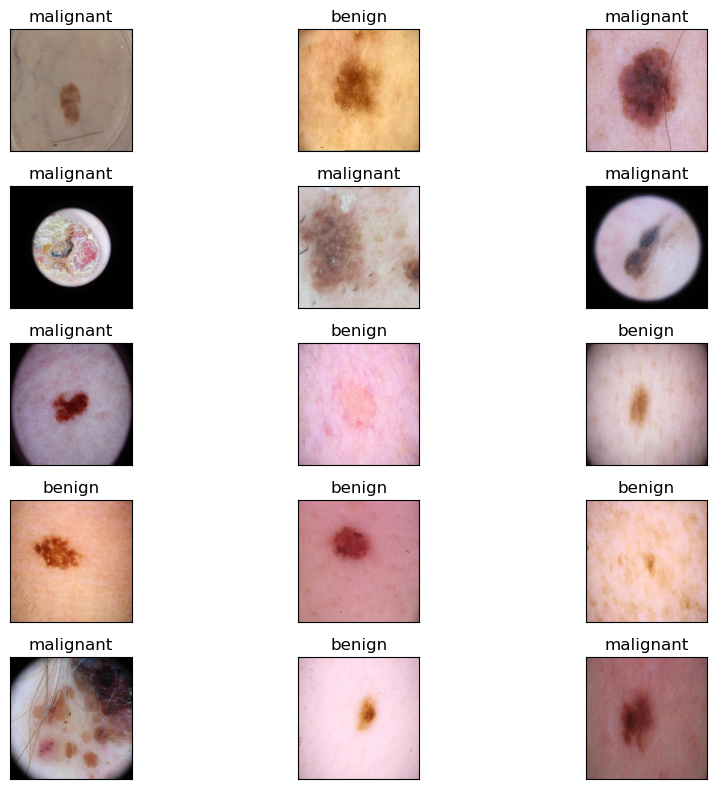

In [14]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [15]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [16]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed = 42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed = 42
)
test_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


Found 7203 validated image filenames belonging to 2 classes.
Found 2402 validated image filenames belonging to 2 classes.
Found 2402 validated image filenames belonging to 2 classes.


In [17]:
pretrained_model = ResNet50(
    input_shape=(100,100,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [18]:
inputs = pretrained_model.input
x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)
outputs = Dense(2, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

In [19]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
my_callbacks = [EarlyStopping(monitor='val_accuracy',
                             min_delta=0,
                             patience=2,
                             mode='auto')]

In [21]:
history=model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=2
)

Epoch 1/2


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


226/226 ━━━━━━━━━━━━━━━━━━━━ 180s 779ms/step - accuracy: 0.8561 - loss: 0.3516 - val_accuracy: 0.9188 - val_loss: 0.2102
Epoch 2/2
226/226 ━━━━━━━━━━━━━━━━━━━━ 179s 793ms/step - accuracy: 0.9151 - loss: 0.2085 - val_accuracy: 0.8959 - val_loss: 0.2361


In [22]:
model.save("model_resnet50.h5")

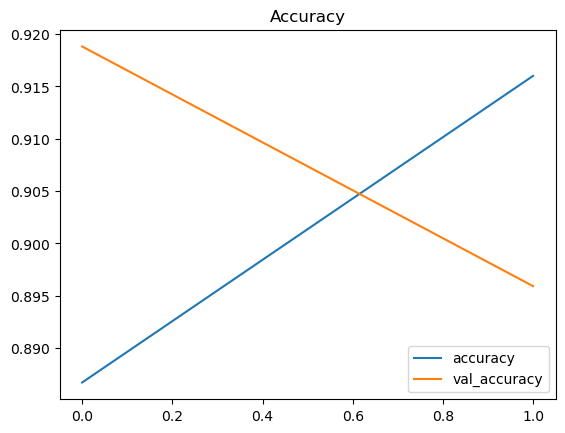

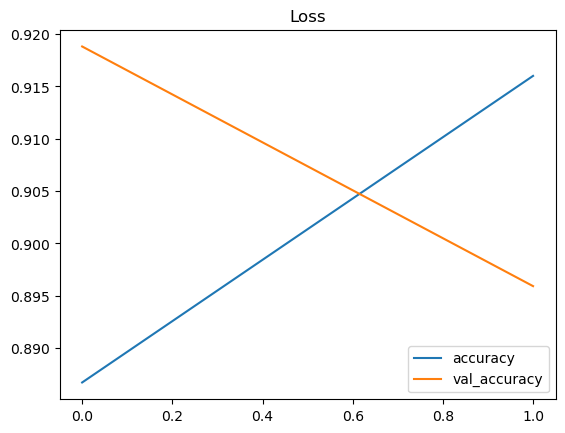

In [23]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Loss")
plt.show()

In [24]:
results = model.evaluate(test_gen, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test Loss: 0.23609
Test Accuracy: 89.59%


In [25]:
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

76/76 ━━━━━━━━━━━━━━━━━━━━ 22s 273ms/step


In [26]:
y_test = list(test.Label)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      benign       0.93      0.86      0.89      1235
   malignant       0.86      0.94      0.90      1167

    accuracy                           0.90      2402
   macro avg       0.90      0.90      0.90      2402
weighted avg       0.90      0.90      0.90      2402



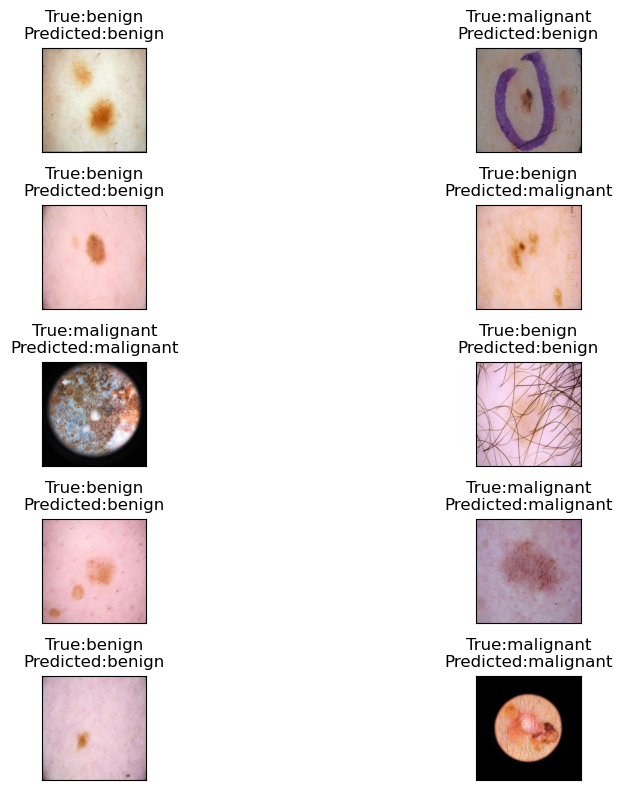

In [27]:
fig,axes = plt.subplots(nrows=5,ncols=2,figsize=(12,8),subplot_kw={'xticks':[],'yticks':[]})
for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True:{test.Label.iloc[i]}\nPredicted:{pred[i]}")
plt.tight_layout()
plt.show()

In [28]:
from tensorflow.keras.models import load_model
loaded_model_imageNet = load_model("model_resnet50.h5")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step
[[32 67]]


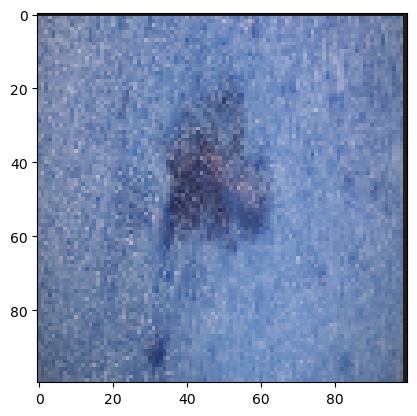

In [29]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
img_path = 'Screenshot 2024-04-01 at 9.55.01 PM.png'
img = cv2.imread(img_path)
img = cv2.resize(img,(100,100))

plt.imshow(img)
x = np.expand_dims(img,axis=0)
x = preprocess_input(x)
result = loaded_model_imageNet.predict(x)
print((result*100).astype('int'))
plt.imshow(img)

In [30]:
p = list((result*100).astype('int'))
pp = list(p[0])
pp


[32, 67]

In [31]:
max(pp)

67

In [32]:
index = pp.index(max(pp))

In [33]:
index

1

In [34]:
name_class = ['benign','melignant']

In [35]:
name_class[index]

'melignant'

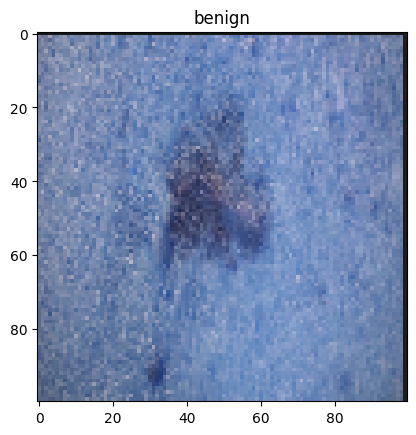

In [34]:
plt.title(name_class[index])
plt.imshow(img)